# Setup

In [0]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

tcmalloc: large alloc 1073750016 bytes == 0x5ae98000 @  0x7fcf8ce342a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
0.4.0
True


In [0]:
!pip3 install Pillow==4.0.0
!pip3 install PIL
!pip3 install image

In [0]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

plt.ion()

In [0]:
trans = transforms.Compose([transforms.RandomRotation(15),transforms.ToTensor(),transforms.Normalize([0.5],[0.5])])

testrans = transforms.Compose([transforms.ToTensor(),transforms.Normalize([0.5],[0.5])])

trainset = torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=trans)

testset = torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=testrans)

In [0]:
train_loader = torch.utils.data.DataLoader(
                 dataset=trainset,
                 shuffle=True,
                 batch_size=100)

test_loader = torch.utils.data.DataLoader(
                        dataset=testset,
                        shuffle=True)

In [0]:
from SpTrans_Utils import *

In [0]:
import torch.optim as optim

loss_func = nn.CrossEntropyLoss()

model = Net()

model = model.cuda()

optimizer = optim.SGD(model.parameters(),lr=0.0007,momentum=0.95)

In [0]:
from torch.autograd import Variable

# Training

In [0]:
losses = []

In [0]:
for epoch in range(30):
    for i,itr in enumerate(train_loader):
        x,y=itr[0],itr[1]
        x = x.cuda()
        y=y.cuda()
        inputs, labels = Variable(x),Variable(y)
        optimizer.zero_grad()
        answer = model(inputs)
        loss = loss_func(answer,labels)
        loss.backward()
        optimizer.step()
        losses.append(loss)
        if(i%10000==0):
            print(loss)

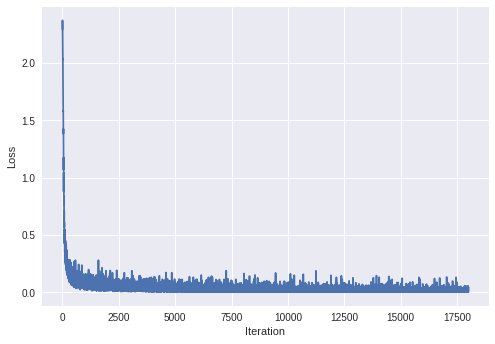

In [0]:
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Testing

In [0]:
correct=0
total=len(test_loader)
with torch.no_grad():
    for image,label in test_loader:
        image = image.cuda()
        label = label.cuda()
        output = model(image)
        pred = output.max(1,True)[1]
        if(pred==label):
          correct+=1

In [0]:
print("Test accuracy:"+str(correct/total))

Test accuracy:0.9939


In [0]:
device='cuda'

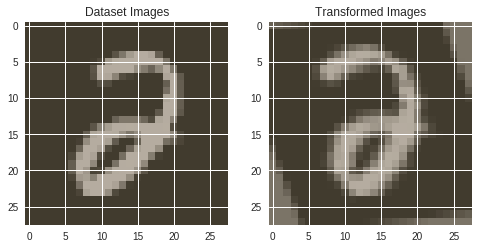

In [0]:
visualize_stn(test_loader)